In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fancyimpute import KNN
import seaborn as sns

Using TensorFlow backend.


In [2]:
os.chdir("E:\Projects\Loan Prediction Hackathon")
os.getcwd()

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_Loan_ID = test.loc[:,'Loan_ID']

print(train.shape)
print(test.shape)

train.dtypes

(614, 13)
(367, 12)


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [3]:
test_Loan_ID

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [4]:
colnames_numeric = train.select_dtypes(np.number)
colnames_numeric_test = test.select_dtypes(np.number)
train.dtypes
# train.head()

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
# train['Loan_Status'] = train['Loan_Status'].astype("category")           
colnames = train.select_dtypes('object').columns
colnames = test.select_dtypes('object').columns
print(colnames)
for column in colnames:
    train[column] = train[column].astype('category')
    train[column] = train[column].cat.codes

for column in colnames:
    test[column] = test[column].astype('category')
    test[column] = test[column].cat.codes
 
train.head()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,Y
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


ApplicantIncome


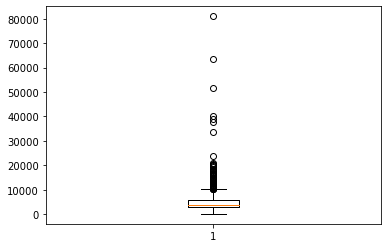

CoapplicantIncome


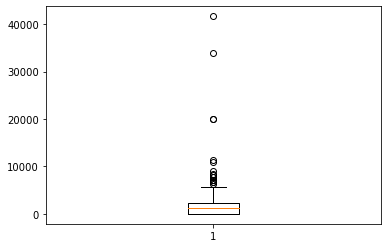

LoanAmount


c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


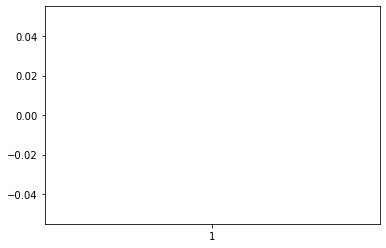

Loan_Amount_Term


c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


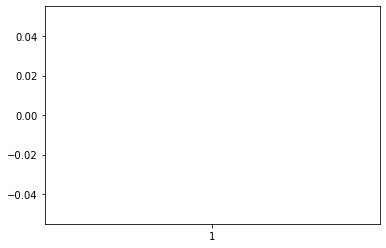

Credit_History


c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


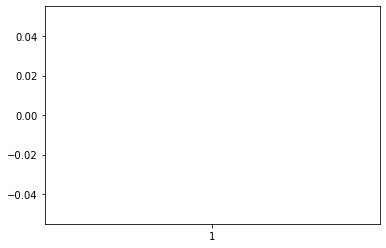

Imputing row 1/614 with 1 missing, elapsed time: 0.183
Imputing row 101/614 with 0 missing, elapsed time: 0.186
Imputing row 201/614 with 0 missing, elapsed time: 0.195
Imputing row 301/614 with 0 missing, elapsed time: 0.197
Imputing row 401/614 with 0 missing, elapsed time: 0.200
Imputing row 501/614 with 0 missing, elapsed time: 0.207
Imputing row 601/614 with 9 missing, elapsed time: 0.211
Imputing row 1/367 with 0 missing, elapsed time: 0.064
Imputing row 101/367 with 0 missing, elapsed time: 0.065
Imputing row 201/367 with 0 missing, elapsed time: 0.067
Imputing row 301/367 with 0 missing, elapsed time: 0.068


(614, 13)

In [6]:
# Checkpoint
temp = train.copy()

# Outlier Analysis 

# B-Removing holiday from the list as their are very less no. of holidays(i.e 1's) in 'holiday' column. 


for column in colnames_numeric: 
    q75, q25 = np.percentile(train.loc[:,column],[75,25])
    print(column)
    plt.show(plt.boxplot(train[column]))
#   Calculate IQR
    iqr = q75 - q25

    # Calculate inner and outer fence.
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    # print(minimum,maximum)

    # Drop
#     indexNames = train[train[column] < minimum].index
#     train.drop(indexNames , inplace=True)
    
#     indexNames = train[train[column] > maximum].index
#     train.drop(indexNames , inplace=True)
    
#     replace by nan.
    train.loc[train[column] < minimum ,:column] = np.nan
    train.loc[train[column] > maximum ,:column] = np.nan

train.loc[train['Loan_Status'] == 'Y' ,'Loan_Status'] = 1
train.loc[train['Loan_Status'] == 'N' ,'Loan_Status'] = 0

train = pd.DataFrame(KNN(k=3).fit_transform(train),columns=train.columns)
test = pd.DataFrame(KNN(k=3).fit_transform(test),columns=test.columns)

train.shape


In [7]:
train.loc[train['Loan_Status'] == 'Y' ,'Loan_Status'] = 1
train.loc[train['Loan_Status'] == 'N' ,'Loan_Status'] = 0

train = pd.DataFrame(KNN(k=3).fit_transform(train),columns=train.columns)
test = pd.DataFrame(KNN(k=3).fit_transform(test),columns=test.columns)

train.shape


c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


Imputing row 1/614 with 0 missing, elapsed time: 0.186
Imputing row 101/614 with 0 missing, elapsed time: 0.192
Imputing row 201/614 with 0 missing, elapsed time: 0.192
Imputing row 301/614 with 0 missing, elapsed time: 0.195
Imputing row 401/614 with 0 missing, elapsed time: 0.196
Imputing row 501/614 with 0 missing, elapsed time: 0.198
Imputing row 601/614 with 0 missing, elapsed time: 0.200
Imputing row 1/367 with 0 missing, elapsed time: 0.069
Imputing row 101/367 with 0 missing, elapsed time: 0.070
Imputing row 201/367 with 0 missing, elapsed time: 0.071
Imputing row 301/367 with 0 missing, elapsed time: 0.072


c:\users\love karnval\appdata\local\programs\python\python37\lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


(614, 13)

In [8]:
for column in train.columns: 
    Total=train.loc[train[column].isna()==True]
    print("NaN Occupied ",column," rows :",len(Total)) 

for column in test.columns: 
    Total=test.loc[test[column].isna()==True]
    print("NaN Occupied ",column," rows :",len(Total)) 


train.dtypes

NaN Occupied  Loan_ID  rows : 0
NaN Occupied  Gender  rows : 0
NaN Occupied  Married  rows : 0
NaN Occupied  Dependents  rows : 0
NaN Occupied  Education  rows : 0
NaN Occupied  Self_Employed  rows : 0
NaN Occupied  ApplicantIncome  rows : 0
NaN Occupied  CoapplicantIncome  rows : 0
NaN Occupied  LoanAmount  rows : 0
NaN Occupied  Loan_Amount_Term  rows : 0
NaN Occupied  Credit_History  rows : 0
NaN Occupied  Property_Area  rows : 0
NaN Occupied  Loan_Status  rows : 0
NaN Occupied  Loan_ID  rows : 0
NaN Occupied  Gender  rows : 0
NaN Occupied  Married  rows : 0
NaN Occupied  Dependents  rows : 0
NaN Occupied  Education  rows : 0
NaN Occupied  Self_Employed  rows : 0
NaN Occupied  ApplicantIncome  rows : 0
NaN Occupied  CoapplicantIncome  rows : 0
NaN Occupied  LoanAmount  rows : 0
NaN Occupied  Loan_Amount_Term  rows : 0
NaN Occupied  Credit_History  rows : 0
NaN Occupied  Property_Area  rows : 0


Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

## Feature Scaling

In [9]:

# colnames_numeric_test
for i in colnames_numeric.columns:
    print(i)
    train[i] = (train[i] - train[i].mean())/train[i].std()

    
for i in colnames_numeric_test.columns:
    print(i)
    test[i] = (test[i] - test[i].mean())/test[i].std()


ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


(614, 13)


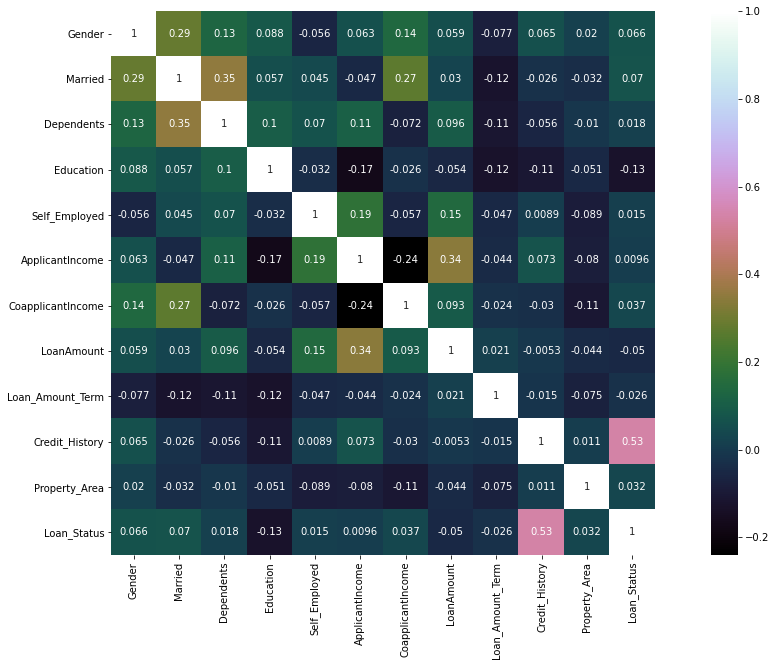

In [10]:
# ### Correlation Analysis : Only for continuous numeric variables.
#   # Correlation plot.NOTE:cp is only for continuous numeric variables.
#   # Extreme Blue:highly positively correlated.
#   # Extreme Red :highly negatively correlated.
# colnames=['age', 'employ', 'address', 'income', 'debtinc', 'creddebt',
#        'othdebt']
colnames = train.columns[1:]

df_corr = train.loc[:,colnames]
# print(df_corr.shape)


# # Plot using seaborn library.

corr_mat=df_corr.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

print(train.shape)

## Logistic Regression

In [11]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.model_selection import train_test_split


train.loc[train['Loan_Status'] == 'Y' ,'Loan_Status'] = 1
train.loc[train['Loan_Status'] == 'N' ,'Loan_Status'] = 0

# train = train.dropna()
print(train.shape)
# define dataset
X = train.iloc[:, 1:len(train.columns)-1] 
Y = train.iloc[:, len(train.columns)-1]

temp_test = test
# test=test.dropna()
# X_test = test.iloc[:, 0:len(test.columns)]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.linear_model import LogisticRegression
import scikitplot as skplt

lr = LogisticRegression()
lr.fit(x_train, y_train)
LR_Predictions = lr.predict(test.iloc[:,1:])


(614, 13)


c:\users\love karnval\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\love karnval\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\love karnval\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\love karnval\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\u

In [12]:
LR_Predictions

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

## XGB Classifier

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Dividing data into train and test.
X = train.iloc[:, 1:len(train.columns)-1].values 
Y = train.iloc[:, len(train.columns)-1].values
# X = bld.values[:len(bld)-1,0:len(bld.columns)-1]
# Y = bld.values[:len(bld)-1,len(bld.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.37,random_state=0)

XGB_model = XGBClassifier(random_state=0, n_estimators=53, learning_rate=1.32, max_depth=6).fit(x_train,y_train)
# model = XGBClassifier( random_state=0, n_estimators=140, learning_rate=0.14, max_depth=6)



# predict the target on the train dataset
# XGB_Predictions = XGB_model.predict(test.to_numpy())
XGB_Predictions = XGB_model.predict(test.iloc[:, 1:len(train.columns)-1].values)



In [14]:
XGB_Predictions

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [15]:
list = [LR_Predictions, XGB_Predictions]
list_name = ['LR_Predictions', 'XGB_Predictions']
i=0
for prediction in list:

    test_Loan_ID_column = test_Loan_ID.to_numpy().reshape(367,1)
    # test_Loan_ID_column

    predicted = pd.DataFrame(test_Loan_ID_column, columns=['Loan_ID'])
    predicted['Loan_Status'] = pd.DataFrame(prediction)
    predicted.loc[predicted['Loan_Status'] == 1.0 ,'Loan_Status'] = 'Y'
    predicted.loc[predicted['Loan_Status'] == 0.0 ,'Loan_Status'] = 'N'
    
    predicted.to_csv(list_name[i] + '.csv', encoding='utf-8', index=False)
    i+=1


In [16]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
len(X[0])

11

In [19]:
# "Ek nayi file"(must) mei cat codes ki jagah category variable ko split karna hai naye columns mei 